In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Индивидуальные параметры, фукнции

In [15]:
# Подсчитано аналитически
A = 2. / np.pi

In [16]:
# Плотность распределения
def f_small(l):
    return A / (l**2 + 1)

In [17]:
# Функция распределения
def F_big(l):
    return A * np.arctan(l)

In [18]:
# Обратная к F_big. [0, 1] -> [0, +inf]
def F_inv(r):
    return np.tan(r/A)

In [19]:
M = 10000
# N_list = np.array([100, 1000, 10000, 100000])
N_list = np.logspace(2, 5, 10).astype(int)

In [20]:
dirs = np.array([[0, 1], [1, 0], [0, -1], [-1, 0]])

### Моделирование

In [21]:
init_vals = np.zeros((2,M))
last_vals = np.zeros((len(N_list), 2, M))

In [22]:
from datetime import datetime
now = datetime.now()
hour = now.hour
minute = now.minute
day = now.day
month = now.month
id = hour * 1000000 + minute * 10000 + day * 100 + month

In [29]:
# траектория первой частицы для каждого N
first_particle = [np.zeros((N,2)) for N in N_list]

In [30]:
for i, N in enumerate(N_list):
    curr_vals = init_vals.copy()
    for j in tqdm(range(N)):
        first_particle[i][j] = curr_vals[:,0]
        curr_l = F_inv(np.random.uniform(0, 1, size=M))
        curr_dirs = dirs[np.random.randint(0,4, size=M)].T
        curr_vals += curr_l * curr_dirs
        # assert curr_vals.shape == (2, M)
    last_vals[i] = curr_vals

100%|██████████| 100000/100000 [01:17<00:00, 1291.09it/s]


In [31]:
np.save(f'last_vals_{id}.npy', last_vals)

In [33]:
for i, N in enumerate(N_list):
    np.save(f'first_particle_{N}_{id}.npy', first_particle[i])

### Полученные распределения

In [34]:
ax_lim = 1e6

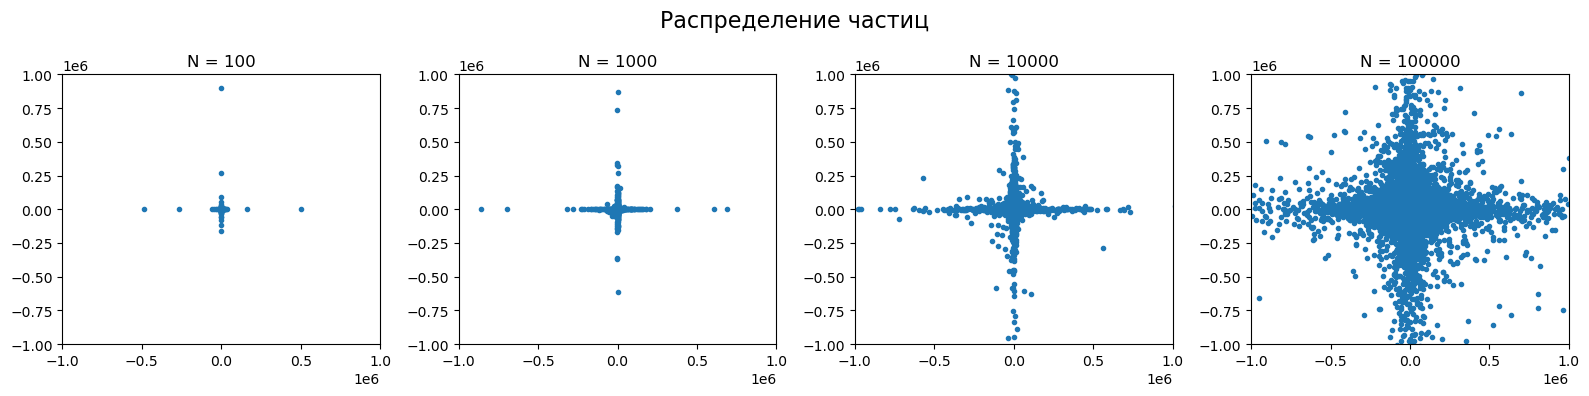

In [40]:
plt.figure(figsize=(4*len(N_list[::3]), 4))
plt.suptitle('Распределение частиц', fontsize=16)
for i, N in enumerate(N_list[::3]):
    plt.subplot(1, len(N_list[::3]), 1 + i)
    plt.title(f'N = {N}')
    plt.plot(last_vals[3*i,0,:], last_vals[3*i,1,:], '.')
    plt.xlim(-ax_lim,ax_lim)
    plt.ylim(-ax_lim,ax_lim)
plt.tight_layout()
plt.show()

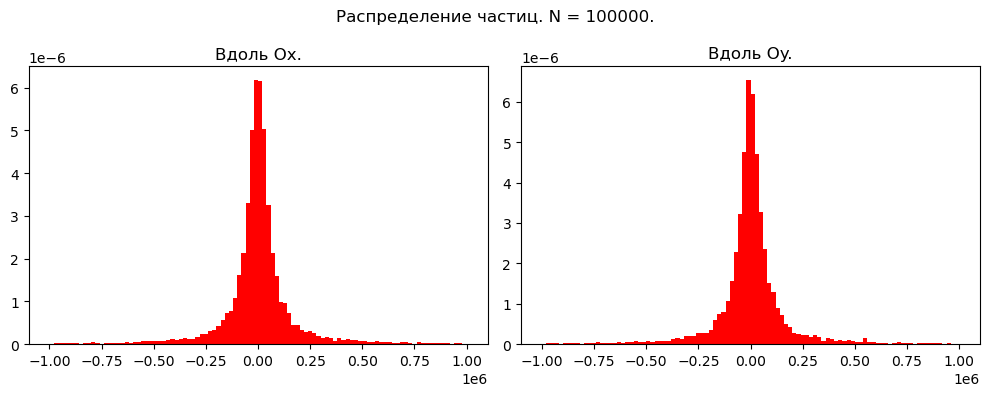

In [36]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частиц. N = {N_list[_idx]}.')

plt.subplot(1,2,1)
plt.hist(last_vals[_idx,0,:], bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e6, 1e6))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(last_vals[_idx,1,:], bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e6, 1e6))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()

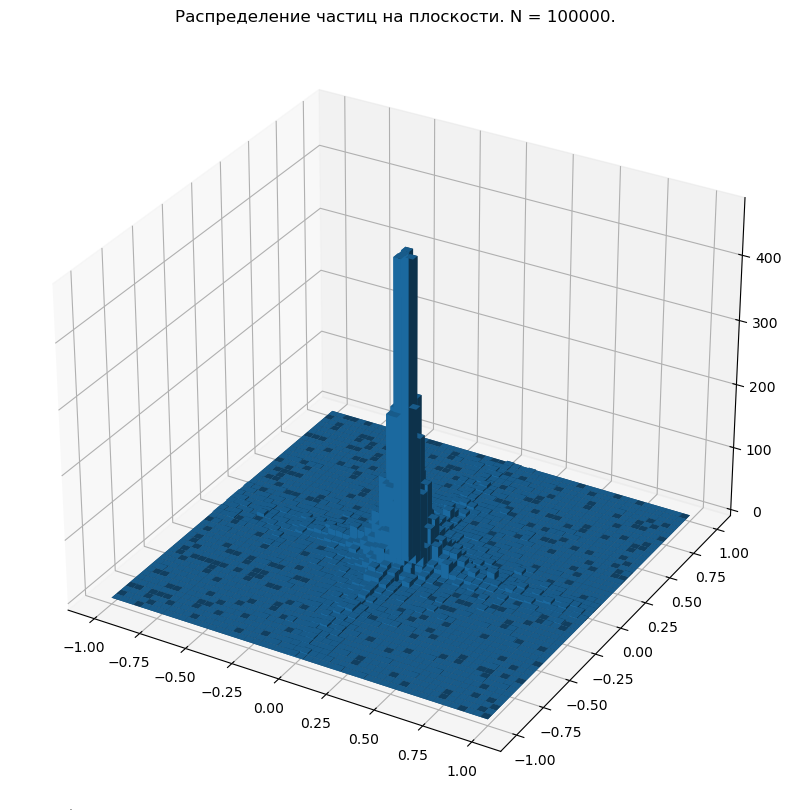

In [39]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
x, y = last_vals[_idx,0,:], last_vals[_idx,1,:]
_lim = 1e6
_bins=50
hist, xedges, yedges = np.histogram2d(x, y, bins=_bins, range=[[-_lim, _lim], [-_lim, _lim]])

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = np.ones_like(zpos)*2*_lim/_bins
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.title(f'Раcпределение частиц на плоскости. N = {N_list[_idx]}.')
plt.show()

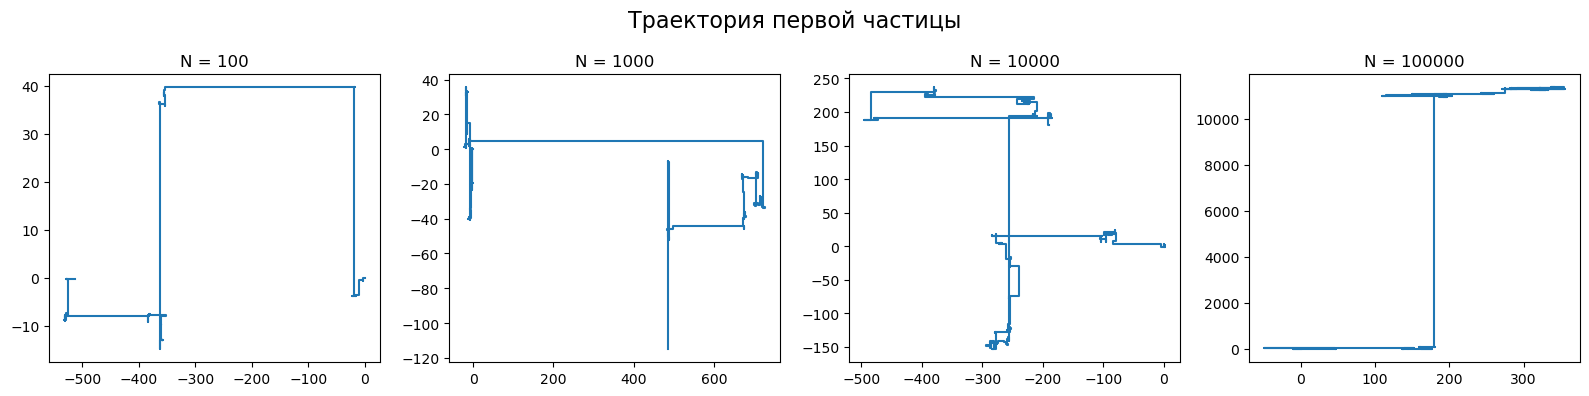

In [95]:
plt.figure(figsize=(4*len(N_list[::3]), 4))
plt.suptitle('Траектория первой частицы', fontsize=16)
for i, N in enumerate(N_list[::3]):
    plt.subplot(1, len(N_list[::3]), 1 + i)
    plt.title(f'N = {N}')
    plt.plot(first_particle[i][:,0], first_particle[i][:,1], '-')
    # plt.plot(first_particle[i][:,0], first_particle[i][:,1], '.')
plt.tight_layout()
plt.show()

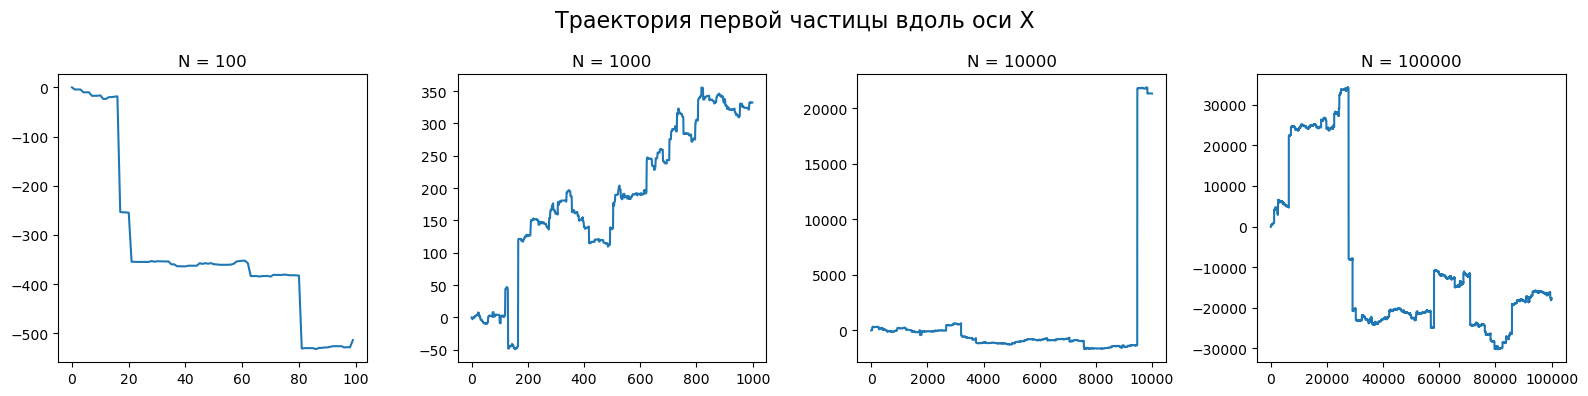

In [96]:
plt.figure(figsize=(4*len(N_list[::3]), 4))
plt.suptitle('Траектория первой частицы вдоль оси X', fontsize=16)
for pl_idx, (i, N) in enumerate(list(enumerate(N_list[::]))[::3]):
    plt.subplot(1, len(N_list[::3]), 1 + pl_idx)
    plt.title(f'N = {N}')
    plt.plot(first_particle[i][:,0], '-')
plt.tight_layout()
plt.show()

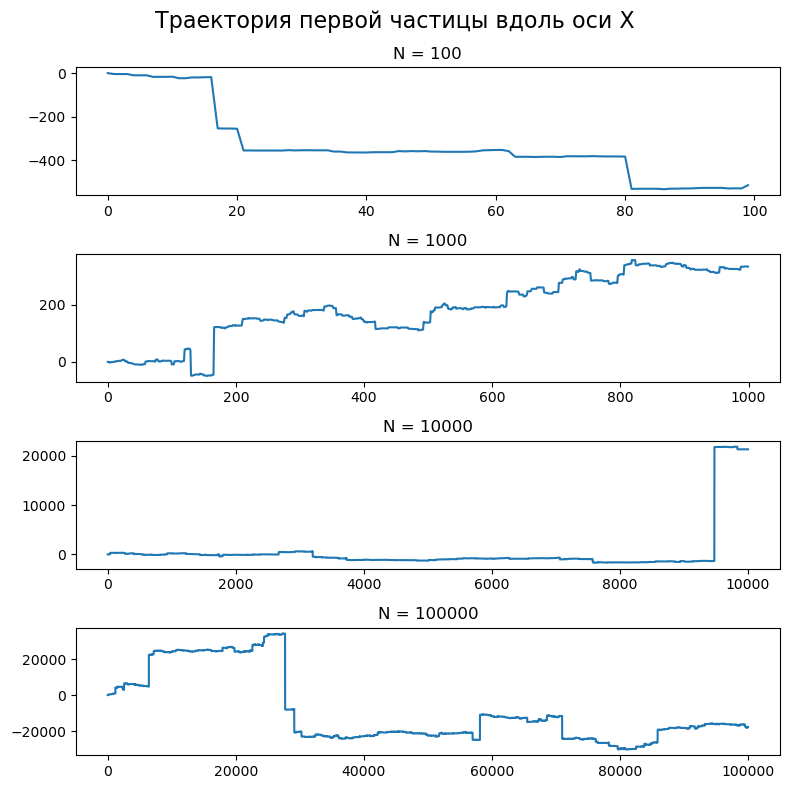

In [97]:
plt.figure(figsize=(8, 2*len(N_list[::3])))
plt.suptitle('Траектория первой частицы вдоль оси X', fontsize=16)
for pl_idx, (i, N) in enumerate(list(enumerate(N_list[::]))[::3]):
    plt.subplot(len(N_list[::3]), 1, 1 + pl_idx)
    plt.title(f'N = {N}')
    plt.plot(first_particle[i][:,0], '-')
plt.tight_layout()
plt.show()

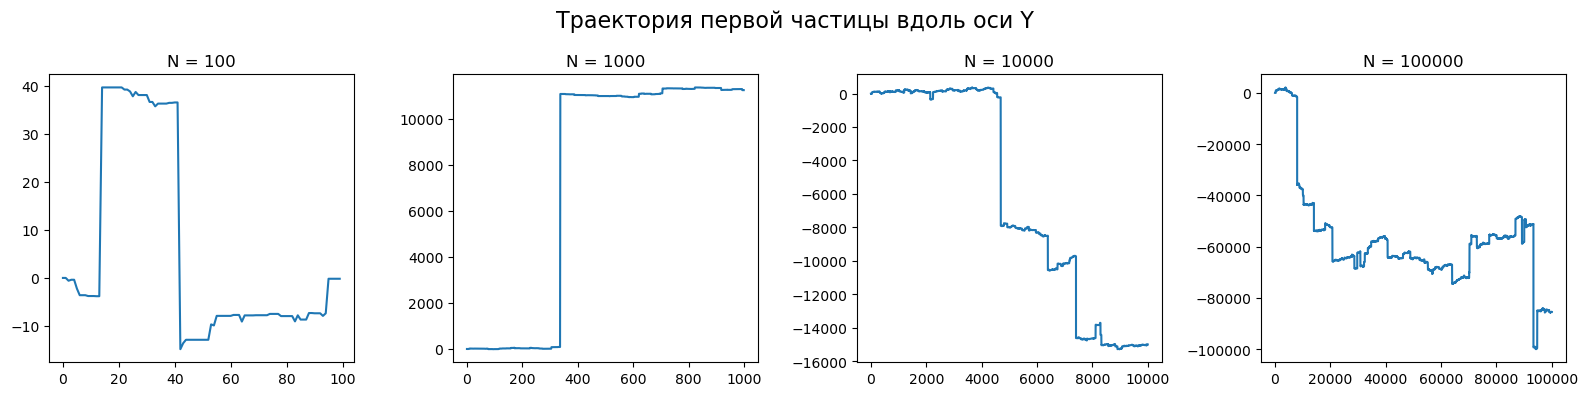

In [98]:
plt.figure(figsize=(4*len(N_list[::3]), 4))
plt.suptitle('Траектория первой частицы вдоль оси Y', fontsize=16)
for pl_idx, (i, N) in enumerate(list(enumerate(N_list[::]))[::3]):
    plt.subplot(1, len(N_list[::3]), 1 + pl_idx)
    plt.title(f'N = {N}')
    plt.plot(first_particle[i][:,1], '-')
plt.tight_layout()
plt.show()

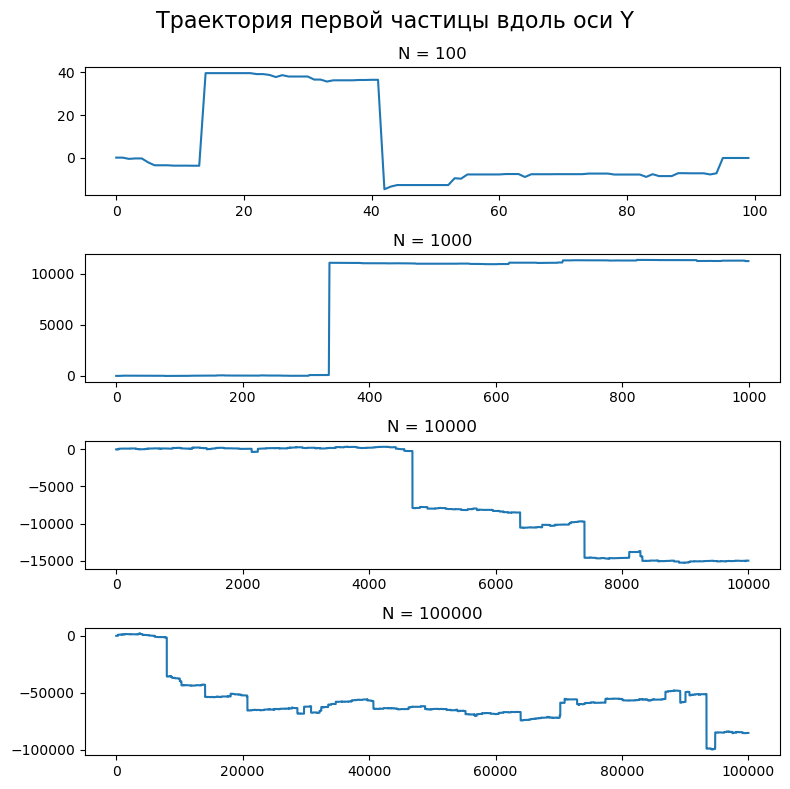

In [99]:
plt.figure(figsize=(8, 2*len(N_list[::3])))
plt.suptitle('Траектория первой частицы вдоль оси Y', fontsize=16)
for pl_idx, (i, N) in enumerate(list(enumerate(N_list[::]))[::3]):
    plt.subplot(len(N_list[::3]), 1, 1 + pl_idx)
    plt.title(f'N = {N}')
    plt.plot(first_particle[i][:,1], '-')
plt.tight_layout()
plt.show()

In [100]:
# длины случайных шагов первой частицы (сдвиги)
shifts_arr = np.abs((first_particle[-1][1:] - first_particle[-1][:-1]).sum(axis=1))
shifts_arr.shape

(99999,)

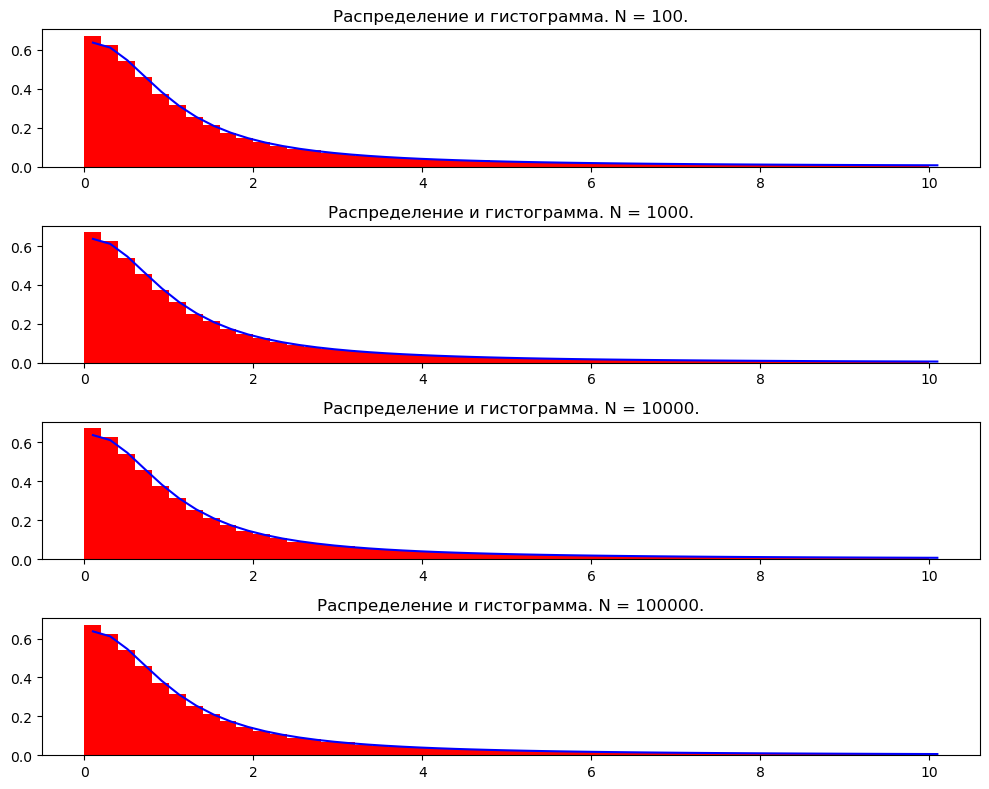

In [105]:
bin_cnt = 50 # кол-во столбиков
bin_w = 1/bin_cnt
rng = (0,10) # диапазон отрисовки

plt.figure(figsize=(10, 2*len(N_list[::3])))
# plt.suptitle('', fontsize=16)
for pl_idx, (i, N) in enumerate(list(enumerate(N_list[::]))[::3]):
    plt.subplot(len(N_list[::3]), 1, 1 + pl_idx)

    plt.hist(shifts_arr, bin_cnt, facecolor='r', density=True, range=(0,10))
    plt.title(f'Раcпределение и гистограмма. N = {N}.')
    plt.plot(np.linspace(rng[0],rng[1],bin_cnt)+(rng[1] - rng[0])*0.5*bin_w, f_small(np.linspace(rng[0],rng[1],bin_cnt)), 'b-')
plt.tight_layout()
plt.show()

### Рассчёт параметров полученных распределений

In [15]:
mean_vals = last_vals.mean(axis=2)
sq_mean_vals = (mean_vals**2)
r_vals = sq_mean_vals.sum(axis=1)**0.5
mean_sq_vals = (last_vals**2).mean(axis=2)
var_vals = last_vals.var(axis=2)
full_var_vals = var_vals.sum(axis=1)

In [16]:
for i, N in enumerate(N_list):
    print(f'----------N={N}----------')
    print(f'<x> = {mean_vals[i,0]},\t<y> = {mean_vals[i,1]}')
    print(f'<R> = {r_vals[i]}')
    print(f'<x^2> = {mean_sq_vals[i,0]},\t<y^2> = {mean_sq_vals[i,1]}')
    print(f'<Δx^2> = {var_vals[i,0]},\t<Δy^2> = {var_vals[i,1]}')
    print(f'<ΔR^2> = {full_var_vals[i]}')

----------N=100----------
<x> = -51.81179584236476,	<y> = 54.50150320225612
<R> = 75.19890983063797
<x^2> = 21168155.908070534,	<y^2> = 16011171.239095062
<Δx^2> = 21165471.445882127,	<Δy^2> = 16008200.82524376
<ΔR^2> = 37173672.27112588
----------N=215----------
<x> = -136.1427533461381,	<y> = 122.53045253667901
<R> = 183.16266291881308
<x^2> = 60138425.8849128,	<y^2> = 113873400.7471175
<Δx^2> = 60119891.03562413,	<Δy^2> = 113858387.03531866
<ΔR^2> = 173978278.0709428
----------N=464----------
<x> = 153.47650672405487,	<y> = 305.6881986069134
<R> = 342.05308489145153
<x^2> = 166982540.64052784,	<y^2> = 4512081287.718189
<Δx^2> = 166958985.60241163,	<Δy^2> = 4511987842.44342
<ΔR^2> = 4678946828.045832
----------N=1000----------
<x> = -407.12679691812406,	<y> = -1017.8204482252021
<R> = 1096.2256581535403
<x^2> = 2414363557.345942,	<y^2> = 16373715884.6004
<Δx^2> = 2414197805.1171737,	<Δy^2> = 16372679926.135574
<ΔR^2> = 18786877731.252747
----------N=2154----------
<x> = -188.52213092

In [21]:
with open(f'stat_{id}.csv', 'w') as f_out:
    f_out.write('N,<x>,<y>,<R>,<x^2>,<y^2>,<Δx^2>,<Δy^2>,<ΔR^2>\n')
    for i, N in enumerate(N_list):
        f_out.write('{},{},{},{},{},{},{},{},{}\n'.format(
            N, mean_vals[i,0], mean_vals[i,1],
            r_vals[i], mean_sq_vals[i,0], mean_sq_vals[i,1],
            var_vals[i,0], var_vals[i,1], full_var_vals[i]))

### Аппроксимация

$$<\Delta R^2_N>  \approx  \mu N^\nu$$

$$log_{10}(<\Delta R^2_N>) \approx  log_{10}(\mu) + \nu log_{10}(N)$$

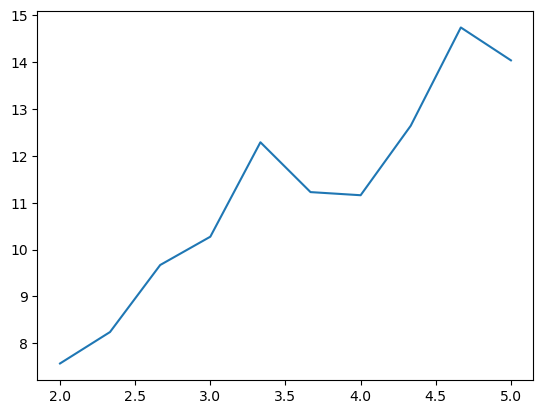

In [22]:
plt.plot(np.log10(N_list), np.log10(full_var_vals))
plt.show()

In [23]:
x = np.log10(N_list)
y = np.log10(full_var_vals)

In [24]:
ln_mu = (y.mean()*(x**2).mean() - (x*y).mean()*x.mean())/((x**2).mean() - x.mean()**2)
ln_mu

3.543044100269646

In [25]:
10**ln_mu

3491.757706005725

In [26]:
nu = ((x*y).mean() - y.mean()*x.mean())/((x**2).mean() - x.mean()**2)
nu

2.1830900464668557

$$log_{10}(<\Delta R^2_N>) \approx  log_{10}\mu + \nu log_{10}(N)$$

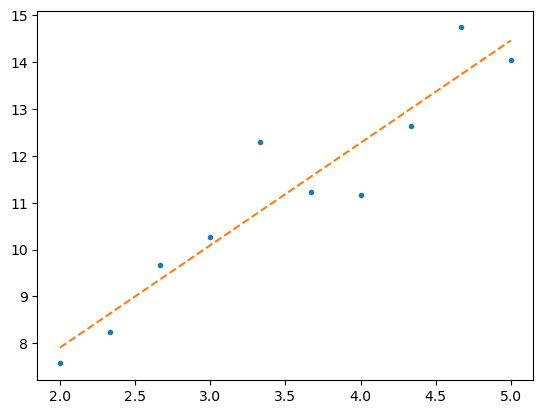

In [27]:
plt.plot(np.log10(N_list), np.log10(full_var_vals),'.')
plt.plot(np.log10(N_list), ln_mu + nu*np.log10(N_list),'--')

plt.show()

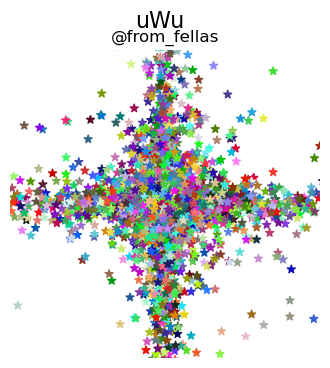

In [109]:
plt.figure(figsize=(4,4))
plt.suptitle('uWu', fontsize=16)
plt.title('@from_fellas')
plt.scatter(curr_vals[0,:],curr_vals[1,:],marker='*', c=np.random.rand(M,3))
plt.xlim(-ax_lim,ax_lim)
plt.ylim(-ax_lim,ax_lim)
plt.axis('off')
plt.show()